In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


## Preprocessing Data

In [3]:
df.shape

(2001, 4)

In [4]:
df[df.isnull().any(axis=1)]

,Humidity,Temperature,Step count,Stress Level


<AxesSubplot:>

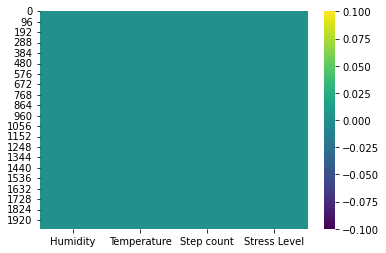

In [5]:
sns.heatmap(df.isnull(), cmap='viridis')

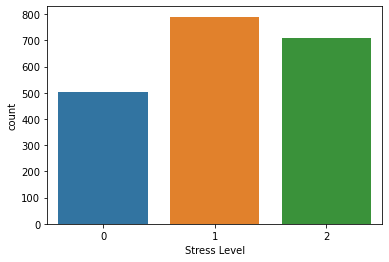

In [6]:
#lets check count of Stress
sns.countplot(df["Stress Level"])
plt.show()

In [7]:
# Compute the correlation matrix
corr = df.corr()
print(corr)

              Humidity  Temperature  Step count  Stress Level
Humidity      1.000000     1.000000    0.870486      0.936036
Temperature   1.000000     1.000000    0.870486      0.936036
Step count    0.870486     0.870486    1.000000      0.832623
Stress Level  0.936036     0.936036    0.832623      1.000000


In [8]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


<AxesSubplot:>

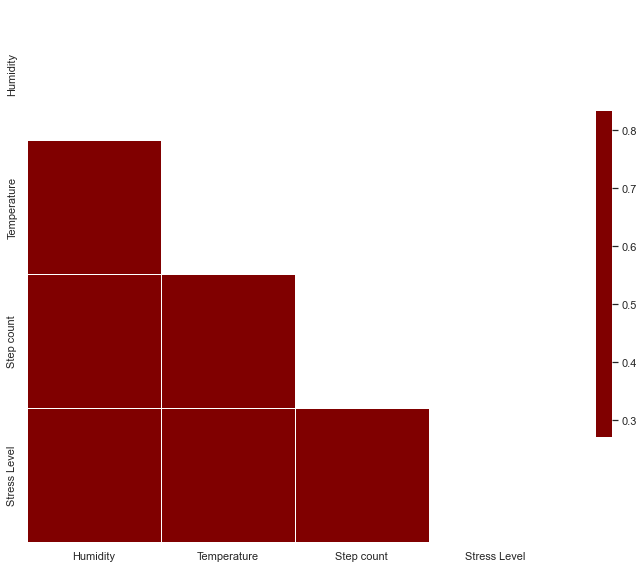

In [9]:
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="jet", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
y = df["Stress Level"]
X = df.drop(columns=["Stress Level"])
print(X.shape, y.shape)

(2001, 3) (2001,)


## Create KNN Classification model

In [11]:
#  Split dataset into train & test components
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X.shape, y.shape)

(2001, 3) (2001,)


In [12]:
# Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
len(X_test)

501

In [13]:
# Use the KNN classifier to fit data:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
clf= classifier.fit(X_train, y_train) 
clf

KNeighborsClassifier()

In [41]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)


In [45]:
# Print training results: 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print("\nThe accuracy score is: ", accuracy_score(y_test, y_predict))

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]

The accuracy score is:  1.0


In [46]:
# Print classfication report
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



In [21]:
# Create pickle file
knnPickle = open('knn_stress_prediction', 'wb') 

# Save the trained model to file
pickle.dump(clf, knnPickle)                      

## Load the model and apply new data from user input

In [47]:
# load the model from disk using pickle
loaded_model = pickle.load(open('knn_stress_prediction', 'rb'))

In [48]:
# Get user input
user_input = {"Humidity": 10, "Temperature": 90, "Step count": 100 }
user_input = pd.DataFrame(user_input, index=[0])
user_input

,Humidity,Temperature,Step count
0,10,90,100


In [49]:
# Reshape user_input data
user_input = user_input.values.reshape(1, -1)
user_input

array([[ 10,  90, 100]], dtype=int64)

In [50]:
# Scaling user_input data
new_data = scaler.transform(user_input)
new_data

array([[-1.73036019,  0.17970597,  0.00768894]])

In [51]:
# Load the model and predict the outcome based on user_input data
ML_guess = loaded_model.predict(new_data) 
ML_guess 

array([1], dtype=int64)

In [52]:
# Print the outcome of ML prediction
print("Your stress level is: ", *np.array(ML_guess))

Your stress level is:  1
